# Mineria de datos
## PRÁCTICA DE VISUALIZACIÓN
## EQUIPO 4:
-Julio César Ramiro Mayorga / 1842201

-Norma Isabel Martínez Valdez / 1941443

-Jisbeth Jaquelin Díaz Vázquez / 1857602

-Linda Karina Requenes Villarreal / 1854552

Base de datos: USED CARS DATASET

URL: https://www.kaggle.com/austinreese/craigslist-carstrucks-data


# Información estadística básica

Realizamos algunas acciones para poder visualizar y trabajar mejor. Realizamos un pequeño resumen desde el principio para ver las diferencias a lo largo del trabajo.
Tomamos la  base de datos y después de realizamos los cambios correspondientes de limpieza de datos.

In [35]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import numpy as np
import json
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as ss



**Base de datos**

In [14]:
# Csv de used cars
df= pd.read_csv("/Users/hp/OneDrive/Escritorio/vehicles.csv") 
print(df) ##Descarga todo el archivo
print(df.shape)##Imprime la cantidad de filas y columnas


                id                                                url  \
0       7222695916  https://prescott.craigslist.org/cto/d/prescott...   
1       7218891961  https://fayar.craigslist.org/ctd/d/bentonville...   
2       7221797935  https://keys.craigslist.org/cto/d/summerland-k...   
3       7222270760  https://worcester.craigslist.org/cto/d/west-br...   
4       7210384030  https://greensboro.craigslist.org/cto/d/trinit...   
...            ...                                                ...   
426875  7301591192  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426876  7301591187  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426877  7301591147  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426878  7301591140  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426879  7301591129  https://wyoming.craigslist.org/ctd/d/atlanta-2...   

                        region                         region_url  price  \
0                     prescott    https://presc

## Visualización de datos

In [15]:
# Cantidad de filas, columnas
print(df.shape)

(426880, 26)


In [79]:
# 126 primeros datos de la tabla
ad = df.head(126)
df1 = ad.drop(["drive","url","region_url","id","type","condition","image_url","description","county","lat","long","posting_date","title_status","size","VIN"],axis=1)
lp = df1.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27],axis=0)
lp = lp.rename(columns = {'region':'Contador','price':'Precio','model':'Modelo','year':'Año','manufacturer':'Marca','cylinders':'Cilindros','fuel':'Combustible','odometer':'Kilometraje','transmission':'Transmision','paint_color':'Color','state':'Estado'})
lp.Contador.replace(to_replace = dict( auburn="1"), inplace = True)
lp

,Contador,Precio,Año,Marca,Modelo,Cilindros,Combustible,Kilometraje,Transmision,Color,Estado
28,1,22590,2010.0,chevrolet,silverado 1500,8 cylinders,gas,71229.0,other,blue,al
29,1,39590,2020.0,chevrolet,silverado 1500 crew,8 cylinders,gas,19160.0,other,red,al
30,1,30990,2017.0,toyota,tundra double cab sr,8 cylinders,gas,41124.0,other,red,al
31,1,15000,2013.0,ford,f-150 xlt,6 cylinders,gas,128000.0,automatic,black,al
32,1,27990,2012.0,gmc,sierra 2500 hd extended cab,8 cylinders,gas,68696.0,other,black,al
...,...,...,...,...,...,...,...,...,...,...,...
121,1,25990,2018.0,volvo,s60 t5 inscription sedan,NaN,diesel,22834.0,other,NaN,al
122,1,6800,2005.0,NaN,blue bird bus,6 cylinders,diesel,180000.0,automatic,yellow,al
123,1,36590,2019.0,volvo,s60 t6 r-design sedan 4d,NaN,gas,7618.0,other,white,al
124,1,35990,2019.0,volvo,s60 t6 r-design sedan 4d,NaN,other,15567.0,other,red,al


**Información de estadística básica**

Por lo pronto nos enfocamos en la penúltima columna, para obtener información. Con esta función sumamos el número de autos en venta por el color de estos.

In [83]:
Colors = lp["Contador"].groupby(lp["Color"]).sum().sort_values(ascending=False)
Colors.head(15)

Color
white     11111111111111111111111
black              11111111111111
red                11111111111111
silver              1111111111111
blue                    111111111
grey                           11
brown                           1
yellow                          1
Name: Contador, dtype: object

En la parte superior acomodamos descendientemente, esto quiere decir que nos muestra el color con mayor frecuencia en ventas en primer lugar, en este caso resultó ser el color Blanco.
Calculando la media del precios de nuestros 100 autos.

In [85]:
a = lp.Precio.mean()
print("La media es:", a) 

La media es: 26686.224489795917


Al seguir trabajando con nuestra data 'Precio' calculamos ciertas medidas de dispersión como lo son la varianza, la mediana y la desviación estándar.

In [86]:
print("Mediana: ",lp.Precio.median())
print("Varianza: ",lp.Precio.var())
print("Desviación estándar: ",lp.Precio.std())

Mediana:  28590.0
Varianza:  90890124.77382705
Desviación estándar:  9533.631248051659


# Gráficas

La siguiente gráfica nos representa la frecuencia del kilometraje de autos en venta.

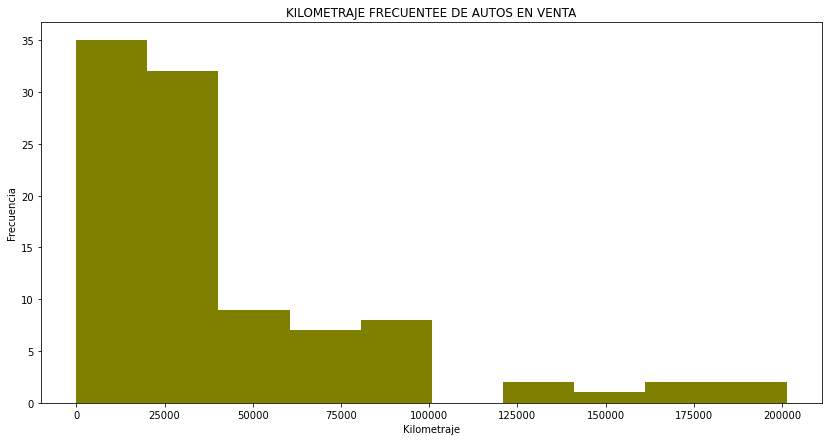

In [105]:
import matplotlib as mt
from matplotlib import pyplot

mt.pyplot.figure(figsize=(14,7))

mt.pyplot.hist(lp['Kilometraje'], color= '#808000')
mt.pyplot.xlabel('Kilometraje')
mt.pyplot.ylabel('Frecuencia')
mt.pyplot.title ("KILOMETRAJE FRECUENTE DE AUTOS EN VENTA")
mt.pyplot.show()

La siguiente gráfica nos representa la frecuencia de autos en venta según el año del modelo en oferta.

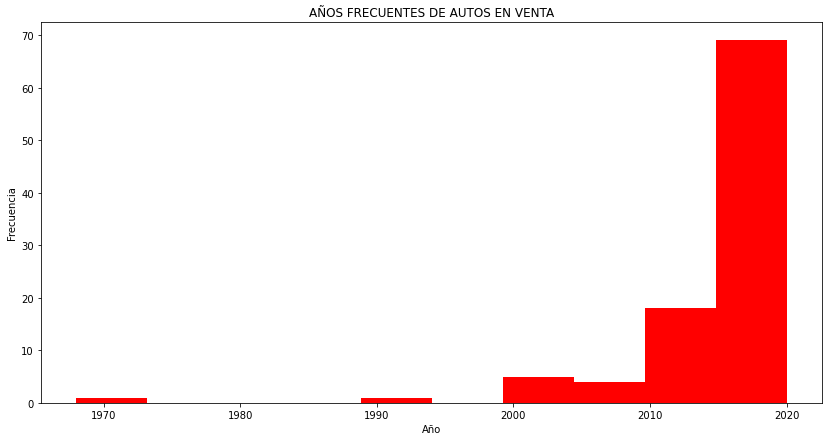

In [107]:
import matplotlib as mt
from matplotlib import pyplot

mt.pyplot.figure(figsize=(14,7))

mt.pyplot.hist(lp['Año'], color= '#ff0000')
mt.pyplot.xlabel('Año')
mt.pyplot.ylabel('Frecuencia')
mt.pyplot.title ("AÑOS FRECUENTES DE AUTOS EN VENTA")
mt.pyplot.show()

El siguiente gráfico nos muestra la cantidad de autos en venta según su marca.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Marca', ylabel='count'>

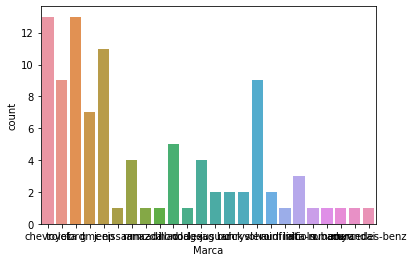

In [111]:
ss.countplot(lp['Marca'])

El siguiente gráfico nos muestra la cantidad de autos en oferta por su color.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Color', ylabel='count'>

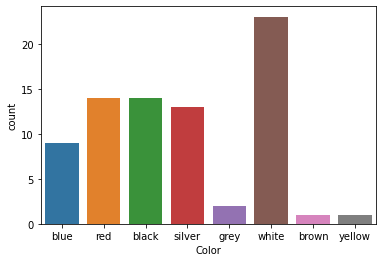

In [112]:
ss.countplot(lp['Color'])

La siguiente gráfica nos representa la relación en color y el precio de los automóviles vendidos. Se puede mostrar que los autos de color rojo tienden a tener un costo más elevado a otros colores. 

<AxesSubplot:xlabel='Color', ylabel='Precio'>

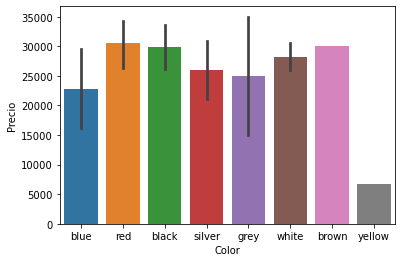

In [90]:
##Grafico de barras 
ss.barplot(x= lp['Color'], y=lp['Precio'])

La siguiente gráfica nos representa la relación en precio y año de los automóviles vendidos. Se puede mostrar que los autos más recientes tendrán un costo más elevado.

<AxesSubplot:xlabel='Precio', ylabel='Año'>

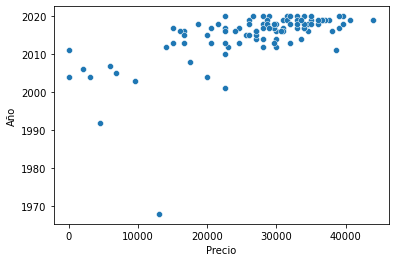

In [91]:
##Gráfica dispersión
ss.scatterplot(x=lp['Precio'], y=lp['Año'])

La siguiente gráfica nos representa la cantidad de los automóviles vendidos según su año. Los autos que suelen ofrecerse más a la venta serán aquellos modelos cerca del año 2017.

<AxesSubplot:>

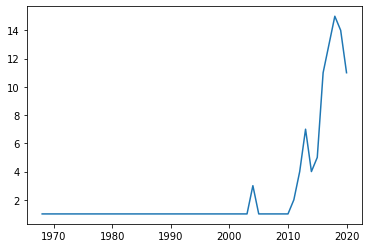

In [94]:
#Gráfico línea
lp['Año'].value_counts().sort_index().plot.line()

Anterior gráfico con relleno.

<AxesSubplot:>

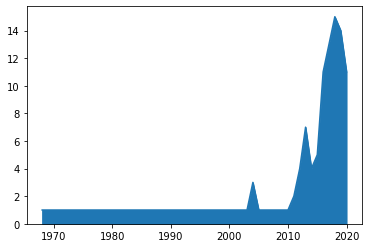

In [95]:
#Gráfico lineal con relleno
lp['Año'].value_counts().sort_index().plot.area()

En el siguiente mostramos la relación directa entre el año del modelo en venta con su precio, remarcando en ello el kilometraje con el que cuenta el automóvil.

<AxesSubplot:xlabel='Año', ylabel='Precio'>

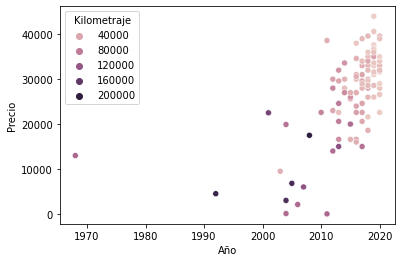

In [109]:
ss.scatterplot(x=lp['Año'], y=lp['Precio'], hue=lp['Kilometraje'])